In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

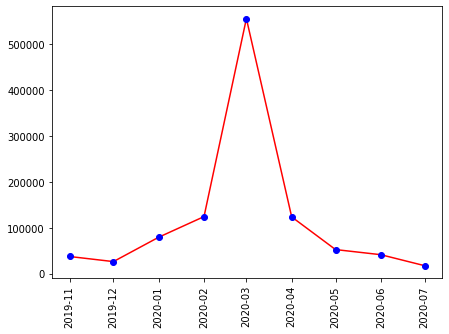

In [3]:
trainmonth = pd.read_excel(r"G:\traindata\yddata\yd_monthsale.xlsx")          #数据读取展示
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.plot(trainmonth['partdate'],trainmonth['money'],'r-')
ax.plot(trainmonth['partdate'],trainmonth['money'],'bo')
plt.xticks(rotation=90)
plt.show

In [4]:
trainmonth  = pd.DataFrame(trainmonth)#日记数据处理，线性回归中不支持日期格式的数据，需转换为数字格式
X = trainmonth.iloc[:,trainmonth.columns != 'money']
X.iloc[:,0] = X.iloc[:,0].apply(pd.to_datetime).map(dt.datetime.toordinal)

In [5]:
y = trainmonth.iloc[:,trainmonth.columns == 'money']
# y.head(10)
y = y.values.reshape(-1, 1)

In [39]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state = 5)#切分数据实验0.3，测试0.7
from sklearn.preprocessing import PolynomialFeatures     #多项式回归
poly = PolynomialFeatures(degree=6,include_bias=False)#添加多项式回归，增加拟合程度
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#
X_poly = poly.fit_transform(X)
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)#建模
j = model.score(Xtest_poly,Ytest)#模型评价

0.5697202944228823

In [40]:
y_pre = model.predict(Xtest_poly)#预测测试值

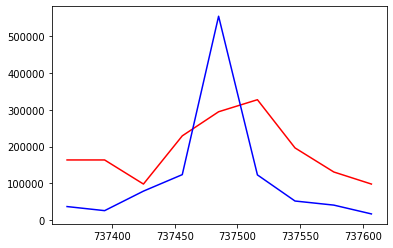

In [41]:
# plt.plot(Xtest,y_pre,'ro')#展示 此处数据较少 使用全部数据
# plt.plot(Xtest,Ytest,'bo')
# plt.show()
Y_pre = model.predict(X_poly)
plt.plot(X,Y_pre,'r-')
plt.plot(X,y,'b-')
plt.show()

In [50]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state = 9)#切分数据实验0.3，测试0.7
reg = LinearRegression().fit(Xtrain,Ytrain)  #直接使用线性模型训练
j = reg.score(Xtest,Ytest)#评价
j

-0.2850167049077805

In [51]:
y_predict =reg.predict(Xtest)#训练测试值

<function matplotlib.pyplot.show(*args, **kw)>

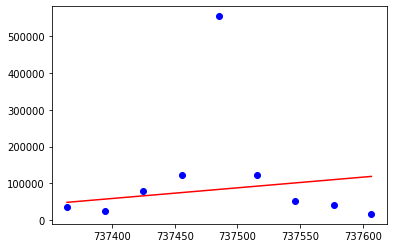

In [54]:
y_hat = reg.predict(X)#展示
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'bo')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

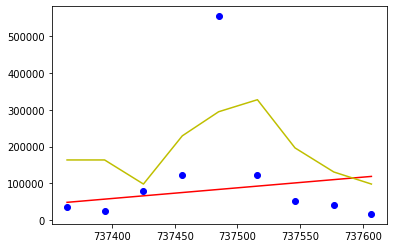

In [56]:
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'bo')
plt.plot(X,Y_pre,'y-')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

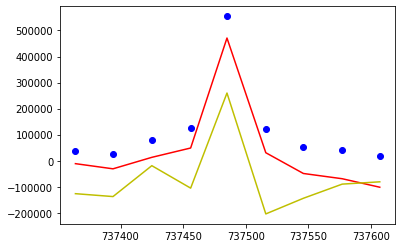

In [57]:
plt.plot(X,y-y_hat,'r-')
plt.plot(X,y,'bo')
plt.plot(X,y-Y_pre,'y-')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

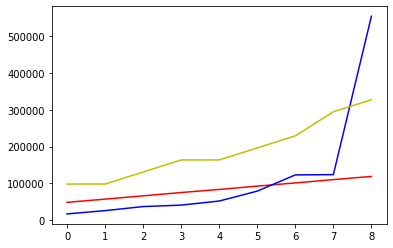

In [58]:
plt.plot(range(len(y_hat)),sorted(y_hat),'r-',label = 'polypredict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.plot(range(len(Y_pre)),sorted(Y_pre),'y-',label = 'predict')
plt.show

In [59]:
from sklearn.metrics import mean_absolute_error

In [61]:
mean_absolute_error(y,y_hat)#普通线性回归平均绝对误差

91809.43772920966

In [62]:
mean_absolute_error(y,Y_pre)#多项式回归平均绝对误差

129922.26666666668